In [208]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report

In [209]:
training_data = pd.read_excel("Absenteeism_at_work.xls")
training_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [210]:
training_data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Lower outlier bound: -7.0
Upper outlier bound: 17.0


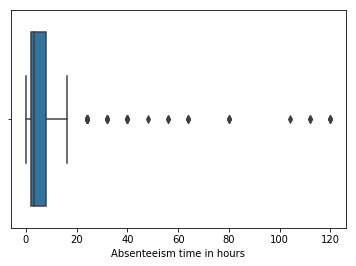

In [211]:
#Preprocessing data - stage 1 (Removing outliers in label)
sns.boxplot(training_data['Absenteeism time in hours'])
median = np.median(training_data['Absenteeism time in hours'])
q75, q25 = np.percentile(training_data['Absenteeism time in hours'], [75 ,25])
iqr = q75 - q25
print("Lower outlier bound:",q25 - (1.5*iqr))
print("Upper outlier bound:",q75 + (1.5*iqr))
#dropping the following outliers above 17
training_data= training_data[training_data['Absenteeism time in hours']<=17]
training_data= training_data[training_data['Absenteeism time in hours']>=-7]

In [212]:
training_data['Absenteeism time in hours'].replace([1,2,3,4,5,6,7,8,9,10],1,inplace=True)
training_data['Absenteeism time in hours'].replace([16,24,40,32,120,80,64,112,56,104,48],1,inplace=True)
training_data['Absenteeism time in hours'].value_counts()

1    652
0     44
Name: Absenteeism time in hours, dtype: int64

In [213]:
training_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,1
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,1
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,1


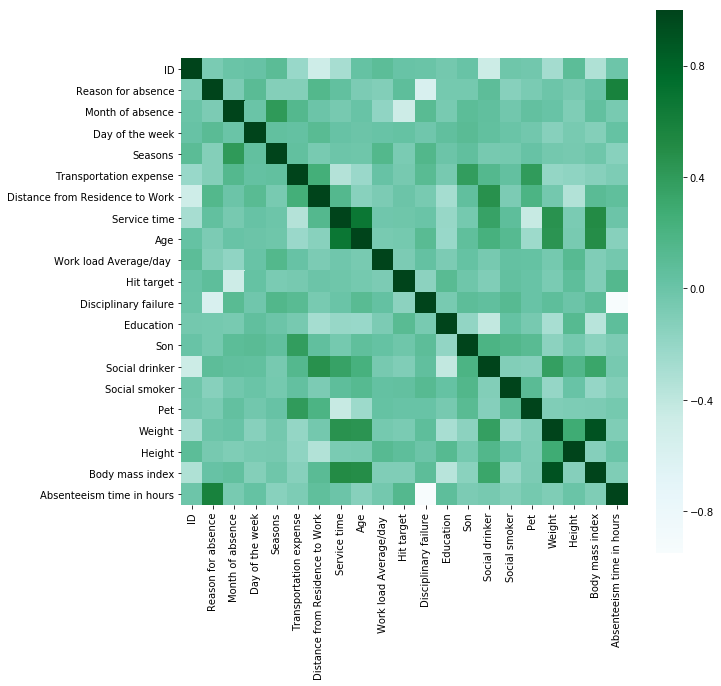

In [214]:
#Calculate the correlation of the above variables
cor = training_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor, square = True,cmap='BuGn') 

In [215]:
#Dropping the following attributes due to multi-collinearity
#training_data.drop('Service time', axis = 1, inplace =True) # drop column "ID"

In [216]:
def logistic(x):   
    if x >= 0:
        z = np.exp(-x)
        a=1 / (1 + z)
    else:        
        z = np.exp(x)
        a= z / (1 + z)
    return  a

def logistic_deriv(x):
    return logistic(x) * (1 - logistic(x))

LR = 1   

I_dim = 19
H_dim = 3

epoch_count = 1

In [217]:
#np.random.seed(1)
weights_ItoH = np.random.uniform(-1, 1, (I_dim, H_dim))
weights_HtoO = np.random.uniform(-1, 1, H_dim)

preActivation_H = np.zeros(H_dim)
postActivation_H = np.zeros(H_dim)

training_data.rename(columns={"Absenteeism time in hours": "Default"}, inplace=True)
training_data.drop('ID', axis = 1, inplace =True) # drop column "ID"
#training_data['Defaul'].unique()

target_output = training_data['Default']
training_data = training_data.drop('Default',axis = 1) 
training_data = np.asarray(training_data)
training_count = len(training_data[:,0])

In [218]:
validation_data = pd.read_excel("Absenteeism_at_work.xls")
validation_data.rename(columns={"Absenteeism time in hours": "Default"}, inplace=True)
validation_data.drop('ID', axis = 1, inplace =True) # drop column "ID"
#Dropping the following attributes due to multi-collinearity
#validation_data.drop('Service time', axis = 1, inplace =True) # drop column "ID"
validation_output = validation_data['Default']
validation_data = validation_data.drop('Default', axis=1) 
validation_data = np.asarray(validation_data)
validation_count = len(validation_data[:,0])

In [219]:
#------------------------------training----------------------------

for epoch in range(epoch_count):
    for sample in range(training_count):
        for node in range(H_dim):
            preActivation_H[node] = np.dot(training_data[sample,:], weights_ItoH[:, node])
            postActivation_H[node] = logistic(preActivation_H[node])
            
        preActivation_O = np.dot(postActivation_H, weights_HtoO)
        postActivation_O = logistic(preActivation_O)
        
        FE = postActivation_O - target_output[sample]
        
        for H_node in range(H_dim):
            S_error = FE * logistic_deriv(preActivation_O)
            gradient_HtoO = S_error * postActivation_H[H_node]
                       
            for I_node in range(I_dim):
                input_value = training_data[sample, I_node]
                gradient_ItoH = S_error * weights_HtoO[H_node] * logistic_deriv(preActivation_H[H_node]) * input_value
                
                weights_ItoH[I_node, H_node] -= LR * gradient_ItoH
                
            weights_HtoO[H_node] -= LR * gradient_HtoO


KeyError: 8

In [ ]:

#------------------------------------validation--------------------------
           
correct_classification_count = 0
for sample in range(validation_count):
    for node in range(H_dim):
        preActivation_H[node] = np.dot(validation_data[sample,:], weights_ItoH[:, node])
        postActivation_H[node] = logistic(preActivation_H[node])
            
    preActivation_O = np.dot(postActivation_H, weights_HtoO)
    postActivation_O = logistic(preActivation_O)
        
    if postActivation_O > 0.5:
        output = 1
    else:
        output = 0     
        
    if output == validation_output[sample]:
        correct_classification_count += 1

print('Percentage of correct classifications:')
print(correct_classification_count*100/validation_count)